In [ ]:
#импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [ ]:
#Доп библиотеки с функциями, которых нет в Scikit-learn
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
#импортируем датасет
data_path = '/content/drive/MyDrive/Colab Notebooks/MLdatasets/Hyderabad.csv'

data = pd.read_csv(data_path)

In [ ]:
# проверим датасет
data

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,6968000,1340,Nizampet,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
1,29000000,3498,Hitech City,4,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,6590000,1318,Manikonda,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5739000,1295,Alwal,3,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,5679000,1145,Kukatpally,2,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2513,11000000,1460,Nacharam,2,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2514,26000000,1314,Manikonda,2,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2515,13300000,2625,Madhapur,3,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2516,10800000,2050,Hitech City,3,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                2518 non-null   int64 
 1   Area                 2518 non-null   int64 
 2   Location             2518 non-null   object
 3   No. of Bedrooms      2518 non-null   int64 
 4   Resale               2518 non-null   int64 
 5   MaintenanceStaff     2518 non-null   int64 
 6   Gymnasium            2518 non-null   int64 
 7   SwimmingPool         2518 non-null   int64 
 8   LandscapedGardens    2518 non-null   int64 
 9   JoggingTrack         2518 non-null   int64 
 10  RainWaterHarvesting  2518 non-null   int64 
 11  IndoorGames          2518 non-null   int64 
 12  ShoppingMall         2518 non-null   int64 
 13  Intercom             2518 non-null   int64 
 14  SportsFacility       2518 non-null   int64 
 15  ATM                  2518 non-null   int64 
 16  ClubHo

In [ ]:
#У нас "лишний" столбец с местоположением недвижимости. Удалим его и сохраним изменения
data = data.drop("Location", axis=1)

In [ ]:
#Проверим изменения
data

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,6968000,1340,2,0,0,1,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
1,29000000,3498,4,0,0,1,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,6590000,1318,2,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5739000,1295,3,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,5679000,1145,2,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2513,11000000,1460,2,1,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2514,26000000,1314,2,1,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2515,13300000,2625,3,1,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2516,10800000,2050,3,0,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


In [ ]:
#Посмотрим статистическую информацию о данных
data.describe()

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
count,2.518000e+03,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,...,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000
mean,9.818380e+06,1644.571088,2.623511,0.227562,0.412629,0.739873,0.709690,0.619142,0.559968,0.606434,...,0.975774,0.360207,0.607228,0.342732,0.330024,0.321287,0.334392,0.342335,0.341144,0.324861
std,8.777113e+06,746.256956,0.687330,0.419341,1.626445,1.611024,1.615231,1.624426,1.627686,1.625308,...,1.557725,1.622778,1.625256,1.621178,1.619894,1.618953,1.620347,1.621139,1.621023,1.619344
min,2.000000e+06,500.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.760000e+06,1160.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.754000e+06,1500.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.090000e+07,1829.000000,3.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.650000e+08,9400.000000,8.000000,1.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [ ]:
#выводим атрибуты нашего датасета
dir(data)

['AC',
 'ATM',
 'Area',
 'BED',
 'Cafeteria',
 'CarParking',
 'ClubHouse',
 'DiningTable',
 'Gasconnection',
 'GolfCourse',
 'Gymnasium',
 'Hospital',
 'IndoorGames',
 'Intercom',
 'JoggingTrack',
 'LandscapedGardens',
 'LiftAvailable',
 'MaintenanceStaff',
 'Microwave',
 'MultipurposeRoom',
 'PowerBackup',
 'Price',
 'RainWaterHarvesting',
 'Refrigerator',
 'Resale',
 'School',
 'ShoppingMall',
 'Sofa',
 'SportsFacility',
 'StaffQuarter',
 'SwimmingPool',
 'T',
 'TV',
 'VaastuCompliant',
 'Wardrobe',
 'WashingMachine',
 'Wifi',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__dataframe__',
 '__dataframe_consortium_standard__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '_

In [ ]:
#Проверяем датасет на заполненность данными(есть ли у нас "дыры" в данных)
pd.isnull(data).any()

,0
Price,False
Area,False
No. of Bedrooms,False
Resale,False
MaintenanceStaff,False
Gymnasium,False
SwimmingPool,False
LandscapedGardens,False
JoggingTrack,False
RainWaterHarvesting,False


<Axes: xlabel='Price', ylabel='Count'>

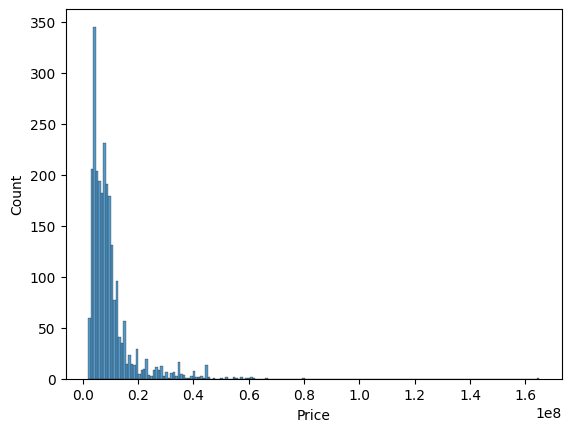

In [ ]:
#Визуализируем данные: сначала в pyplot , потом seaborn
sns.histplot(data, x = 'Price')

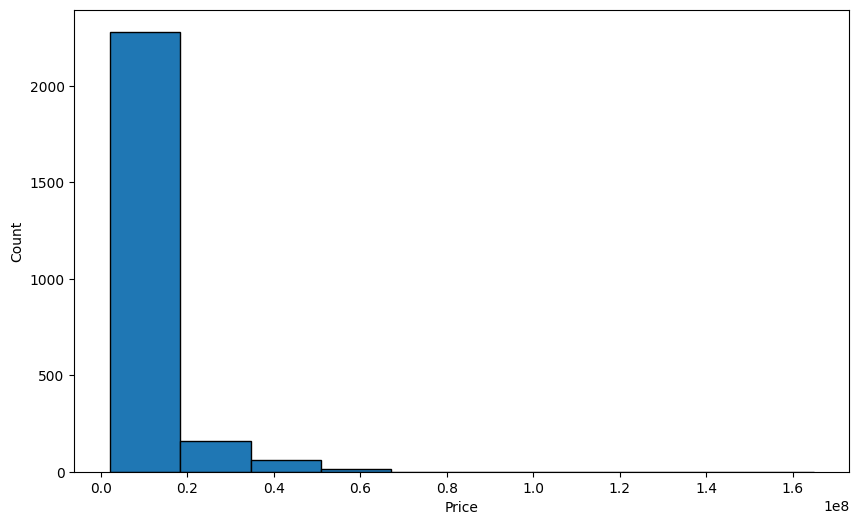

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(data['Price'], bins = 10, ec='black')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

In [ ]:
#Узнаем корреляцию данных(зависимость переменных)
data.corr()

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
Price,1.000000,0.829310,0.614283,0.203878,0.013022,0.068763,0.076059,0.061165,0.065828,0.050957,...,0.029536,-0.003700,0.049295,-0.014067,-0.020505,-0.005373,-0.006059,-0.007628,-0.006858,-0.005895
Area,0.829310,1.000000,0.793565,0.179378,0.043088,0.093148,0.099141,0.081309,0.093165,0.079615,...,0.051778,0.011845,0.081622,0.002862,-0.000402,0.011771,0.011033,0.009901,0.010953,0.012106
No. of Bedrooms,0.614283,0.793565,1.000000,0.136090,0.016765,0.055398,0.063623,0.051222,0.059963,0.044775,...,0.029328,-0.013366,0.062116,-0.023921,-0.024670,-0.011932,-0.012841,-0.017281,-0.012693,-0.013219
Resale,0.203878,0.179378,0.136090,1.000000,0.081881,0.051195,0.055341,0.073040,0.071094,0.064421,...,0.078388,0.113615,0.059494,0.086852,0.073049,0.095333,0.101970,0.108611,0.112524,0.095867
MaintenanceStaff,0.013022,0.043088,0.016765,0.081881,1.000000,0.952863,0.954216,0.964015,0.967709,0.963973,...,0.950637,0.971170,0.964331,0.973057,0.981248,0.977152,0.974862,0.973444,0.974905,0.976960
Gymnasium,0.068763,0.093148,0.055398,0.051195,0.952863,1.000000,0.989644,0.973520,0.970849,0.963838,...,0.957514,0.940831,0.957727,0.945191,0.953655,0.950901,0.950780,0.949130,0.947101,0.950875
SwimmingPool,0.076059,0.099141,0.063623,0.055341,0.954216,0.989644,1.000000,0.976746,0.974147,0.967546,...,0.956308,0.942075,0.960098,0.946378,0.954980,0.951526,0.951403,0.949391,0.947354,0.951693
LandscapedGardens,0.061165,0.081309,0.051222,0.073040,0.964015,0.973520,0.976746,1.000000,0.980454,0.973998,...,0.952697,0.949724,0.968425,0.952056,0.960935,0.955998,0.956167,0.955642,0.955991,0.957040
JoggingTrack,0.065828,0.093165,0.059963,0.071094,0.967709,0.970849,0.974147,0.980454,1.000000,0.976756,...,0.951477,0.951231,0.974066,0.956332,0.965968,0.961301,0.959046,0.956891,0.956309,0.961063
RainWaterHarvesting,0.050957,0.079615,0.044775,0.064421,0.963973,0.963838,0.967546,0.973998,0.976756,1.000000,...,0.952372,0.946877,0.976838,0.950931,0.961856,0.957031,0.954396,0.952402,0.952594,0.956580


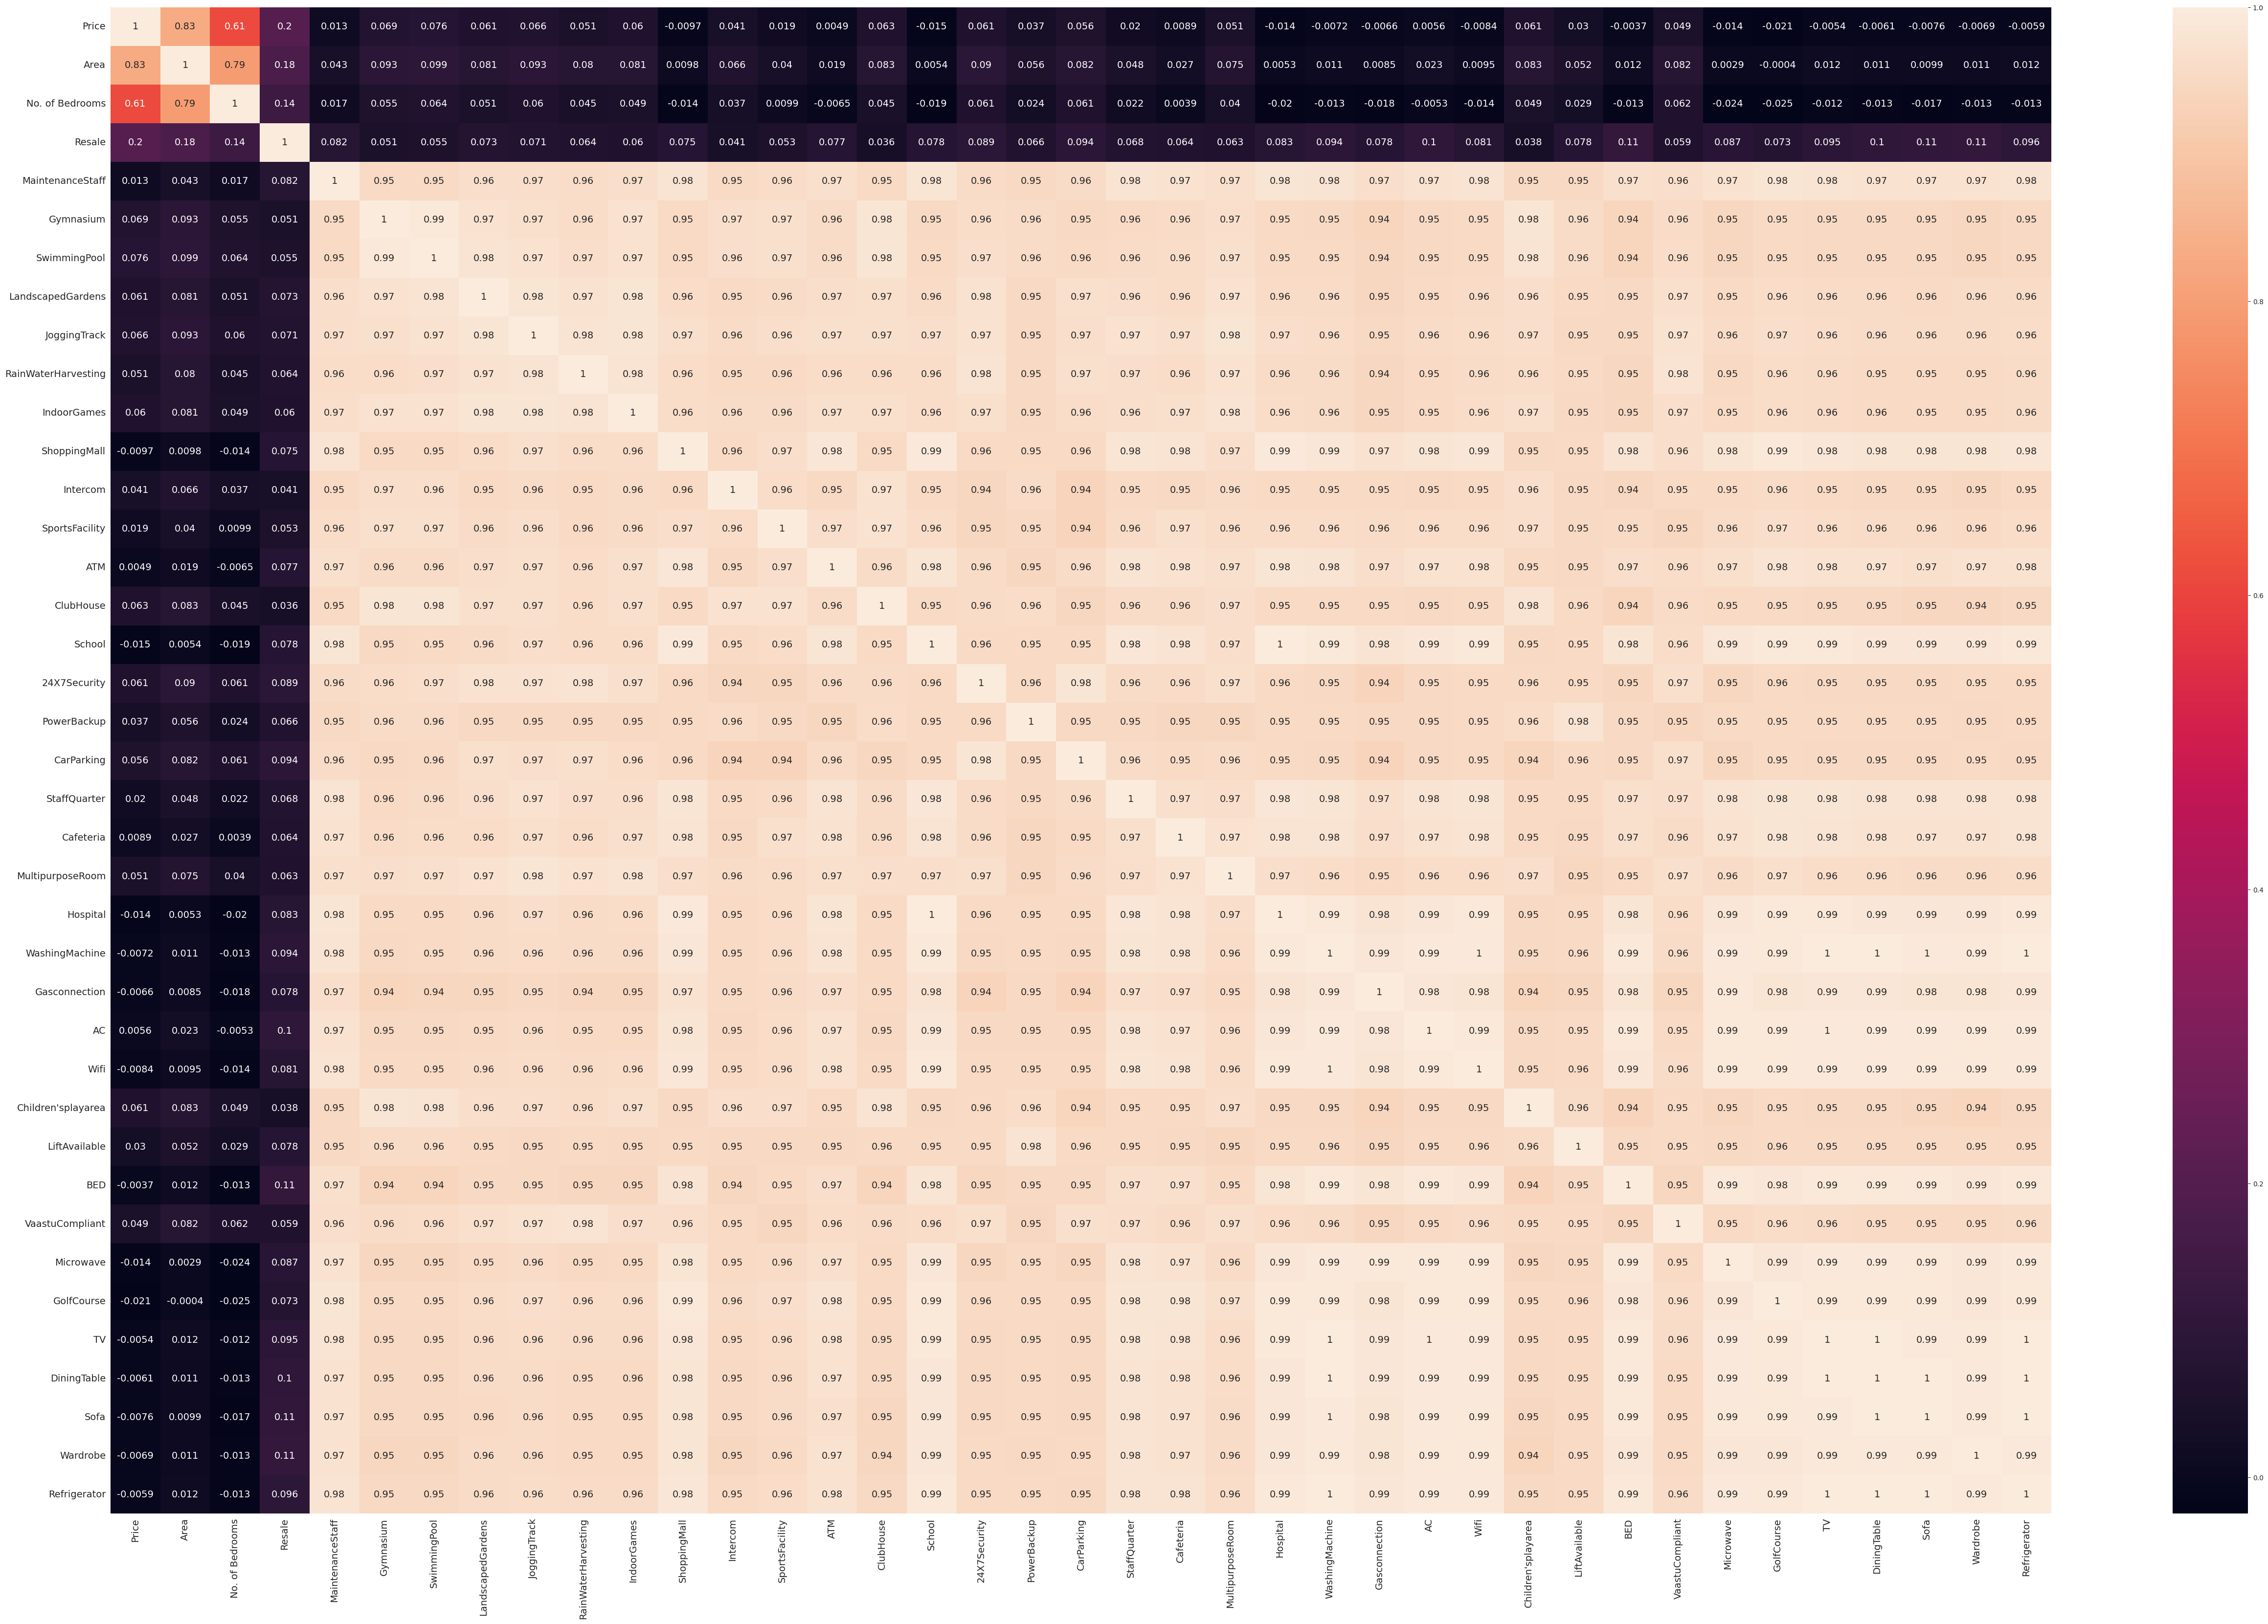

In [ ]:
#Визуализируем
plt.figure(figsize=(64,40))
sns.heatmap(data.corr(),annot = True, annot_kws = {"size": 14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

##Обучение модели

In [ ]:
#Разделим данные на тестовые и обучающие
prices = data['Price']
features = data.drop('Price', axis = 1)

X_train, X_test, y_train , y_test = train_test_split(features,prices, test_size=0.2, random_state=10)

In [ ]:
regr = LinearRegression()
regr.fit(X_train,y_train)

print("Training r-squared: ", regr.score(X_train,y_train))
print("Testing r-squared: ", regr.score(X_test,y_test))

print("Intercept: ", regr.intercept_)
pd.DataFrame(data = regr.coef_, index = X_train.columns, columns = ['coef'])

Training r-squared:  0.7190621714286292
Testing r-squared:  0.6214912024854764
Intercept:  -4147437.679747291


,coef
Area,1.133877e+04
No. of Bedrooms,-1.920447e+06
Resale,1.174623e+06
MaintenanceStaff,-6.538120e+05
Gymnasium,-7.937724e+05
SwimmingPool,6.464206e+05
LandscapedGardens,8.034147e+05
JoggingTrack,-5.105494e+05
RainWaterHarvesting,-5.995340e+05
IndoorGames,8.484255e+05


In [42]:
#Проверка переменных на важность
X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train,X_incl_const)
results = model.fit()

pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

,coef,p-value
const,-4.147438e+06,0.000
Area,1.133877e+04,0.000
No. of Bedrooms,-1.920447e+06,0.000
Resale,1.174623e+06,0.000
MaintenanceStaff,-6.538120e+05,0.141
Gymnasium,-7.937724e+05,0.172
SwimmingPool,6.464206e+05,0.250
LandscapedGardens,8.034147e+05,0.088
JoggingTrack,-5.105494e+05,0.302
RainWaterHarvesting,-5.995340e+05,0.174


In [44]:
variance_inflation_factor(exog=X_incl_const.values, exog_idx=1)

3.023660832464134

In [45]:
#Выясняем взаимосвязи переменных между собой
vif = [variance_inflation_factor(exog=X_incl_const.values, exog_idx=1)
          for i in range(X_incl_const.shape[1])]

pd.DataFrame({'coef_name': X_incl_const.columns, 'vif': np.around(vif,2)})

,coef_name,vif
0,const,3.02
1,Area,3.02
2,No. of Bedrooms,3.02
3,Resale,3.02
4,MaintenanceStaff,3.02
5,Gymnasium,3.02
6,SwimmingPool,3.02
7,LandscapedGardens,3.02
8,JoggingTrack,3.02
9,RainWaterHarvesting,3.02


In [57]:
#ПРоверим сложность модели на BIC

X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train,X_incl_const)
results = model.fit()

org_coef = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues,3)})

print("BIC is", results.bic)
print("r-squared is", results.rsquared)

BIC is 67977.96062087477
r-squared is 0.7190621714286289


In [59]:
#Модель слишком сложная, упростим, выкинув лишние переменные

X_incl_const = sm.add_constant(X_train)
X_incl_cosnt = X_incl_const.drop(['ShoppingMall','Intercom','MultipurposeRoom','Hospital','VaastuCompliant','DiningTable',
                                  'SwimmingPool','JoggingTrack','ClubHouse','School','StaffQuarter'],axis = 1)

model = sm.OLS(y_train,X_incl_const)
results = model.fit()

reduced_coef = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues,3)})

print("BIC is", results.bic)
print("r-squared is", results.rsquared)

BIC is 67977.96062087477
r-squared is 0.7190621714286289


In [60]:
frames = [org_coef, reduced_coef]
pd.concat(frames,axis=1)

,coef,p-value,coef,p-value
const,-4.147438e+06,0.000,-4.147438e+06,0.000
Area,1.133877e+04,0.000,1.133877e+04,0.000
No. of Bedrooms,-1.920447e+06,0.000,-1.920447e+06,0.000
Resale,1.174623e+06,0.000,1.174623e+06,0.000
MaintenanceStaff,-6.538120e+05,0.141,-6.538120e+05,0.141
Gymnasium,-7.937724e+05,0.172,-7.937724e+05,0.172
SwimmingPool,6.464206e+05,0.250,6.464206e+05,0.250
LandscapedGardens,8.034147e+05,0.088,8.034147e+05,0.088
JoggingTrack,-5.105494e+05,0.302,-5.105494e+05,0.302
RainWaterHarvesting,-5.995340e+05,0.174,-5.995340e+05,0.174
